In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [21]:
dir_baseline = '../checkpoints/result/'
dir_density_rgbW_nK = '../checkpoints/result_density_rgbW_np/'
dir_density_rgbW = '../checkpoints/result_density_rgbW/'
dir_density_GMM = '../checkpoints/result_GMM/'
datasets = ['Beauty', 'HoneyBee', 'Jockey']

methods = {
    # "Baseline (Static K-frame selection)": dir_baseline,
    "Removal control (Static K-frame selection)": dir_density_rgbW,
    "Removal control (No K-frame selection)": dir_density_rgbW_nK,
    "Removal control (Adaptive K-frame selection)": dir_density_GMM,
}
data = {dataset: {method: [] for method in methods} for dataset in datasets}
data_K_frames = {dataset: [] for dataset in datasets}

In [22]:
for method_name, dir_path in methods.items():
    for dataset in datasets:
        file_path = os.path.join(dir_path, dataset, "train.txt")
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # 跳过最后一行的平均值，只读帧数据
            for line in lines[:-1]:
                match = re.search(r"Frame_\d+:.*PSNR:([\d.]+)", line)
                if match:
                    psnr = float(match.group(1))
                    data[dataset][method_name].append(psnr)
for dataset in datasets:
    file_path = os.path.join(dir_path, dataset, "K_frames.txt")
    with open(file_path, "r") as f:
        data_K_frames[dataset] = [int(line.strip()) for line in f.readlines()]

[1]


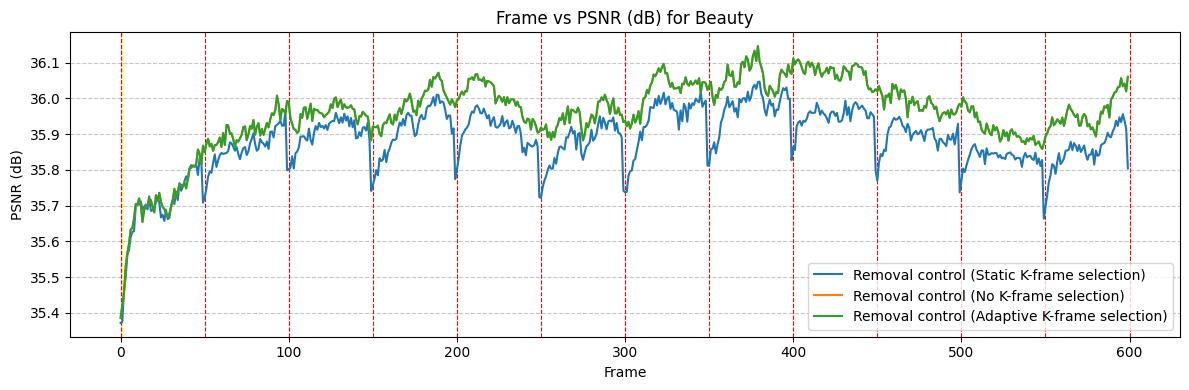

[1]


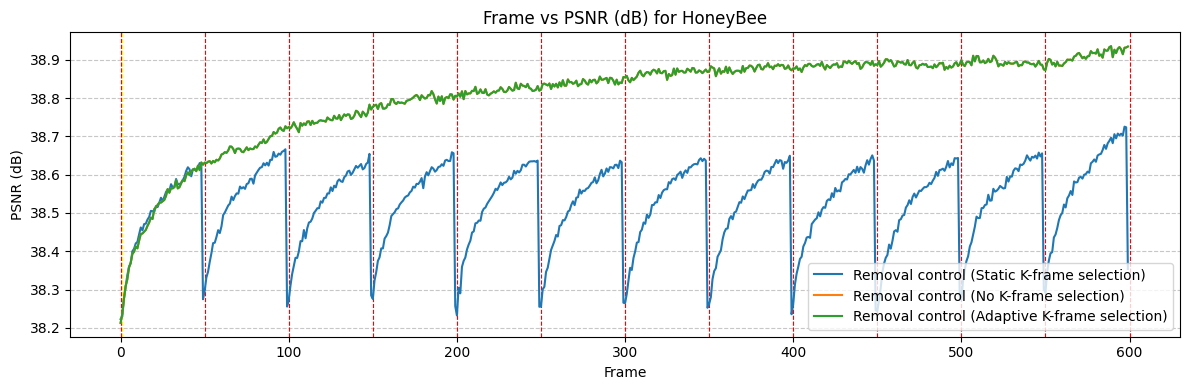

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

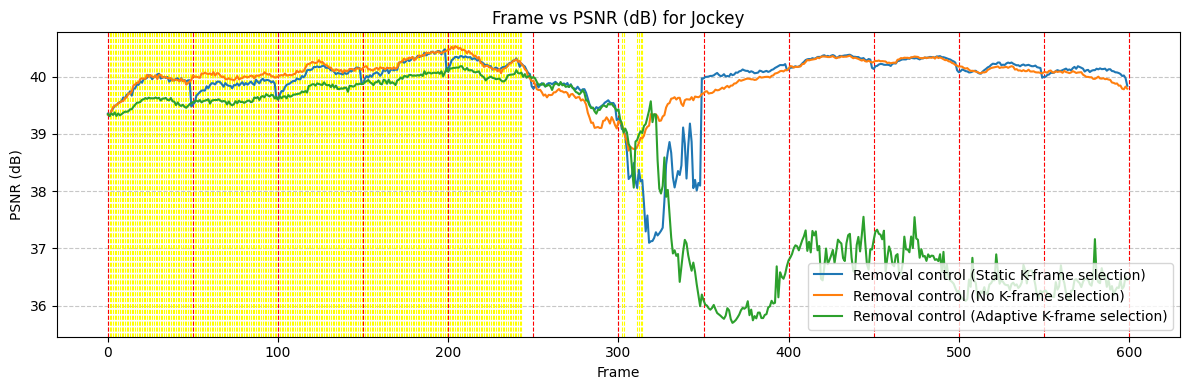

In [24]:
for dataset in datasets:
    plt.figure(figsize=(12, 4))
    for x in range(0, 601):
        if x in data_K_frames[dataset]:
            plt.axvline(x=x, color='yellow', linestyle='--', linewidth=0.8)
    # 添加每隔50帧的红色竖线
    for x in range(0, 601, 50):
        plt.axvline(x=x, color='red', linestyle='--', linewidth=0.8)
    for method_name, psnr_values in data[dataset].items():
        plt.plot(psnr_values, label=method_name, linewidth=1.5)
    print(data_K_frames[dataset])
    
    
    

    
    plt.xlabel('Frame')
    plt.ylabel('PSNR (dB)')
    plt.title(f'Frame vs PSNR (dB) for {dataset}')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()